__Copyright 2017 Igor Vustianiuk__

In [1]:
%matplotlib inline
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pywt

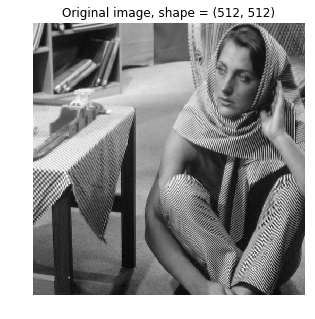

Level 1, shape = (256, 256)


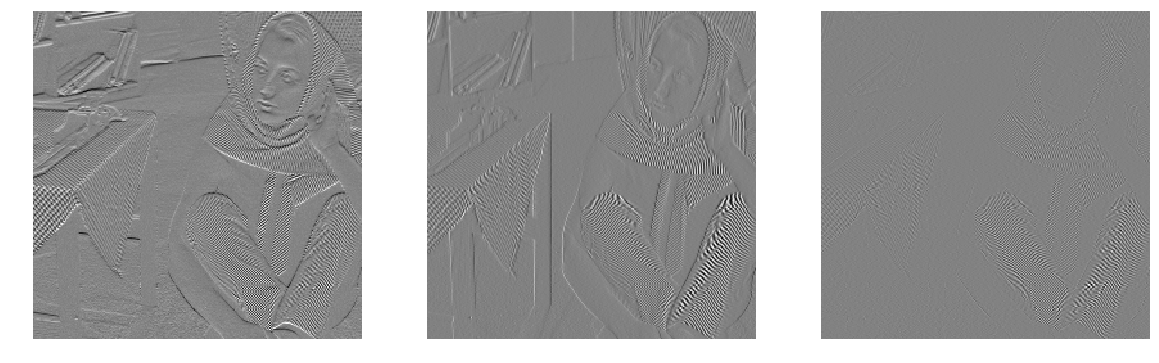

Level 2, shape = (128, 128)


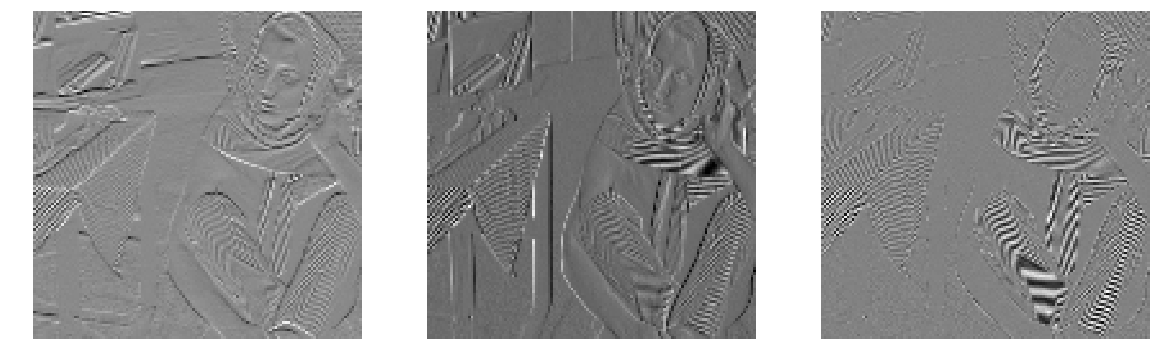

Level 3, shape = (64, 64)


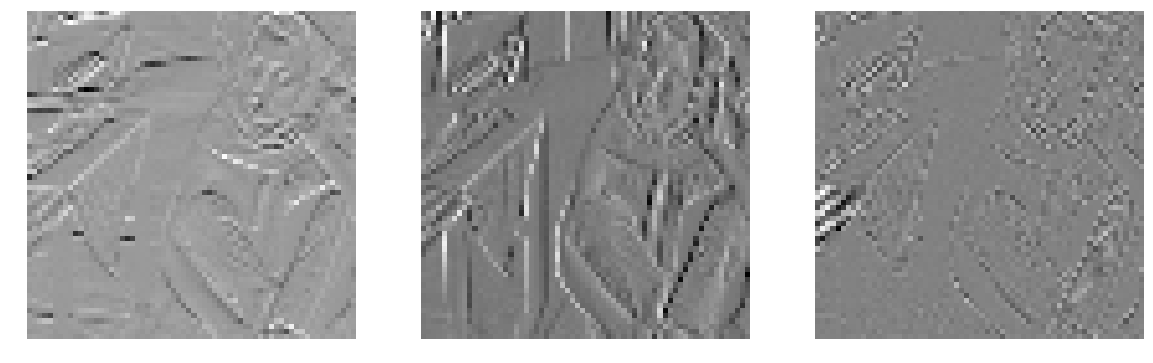

Level 4, shape = (32, 32)


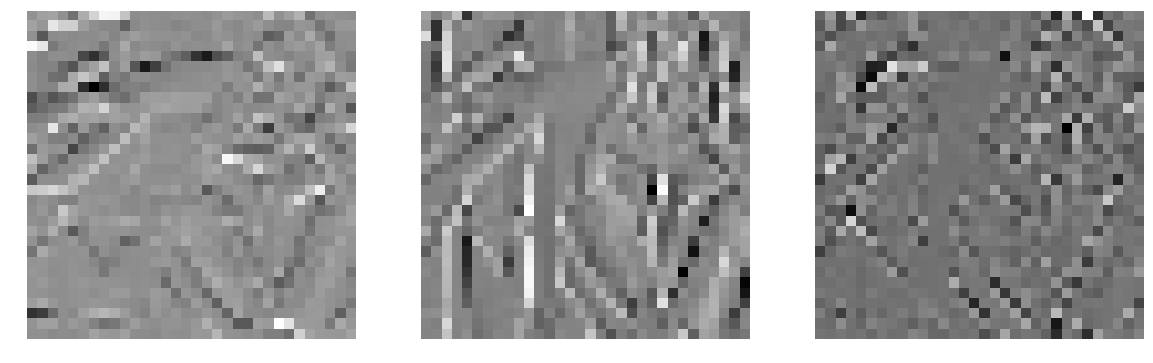

Level 5, shape = (16, 16)


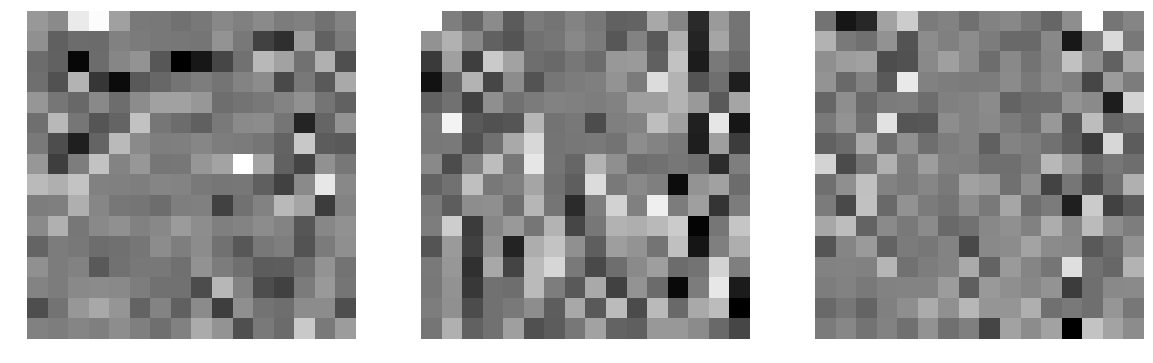

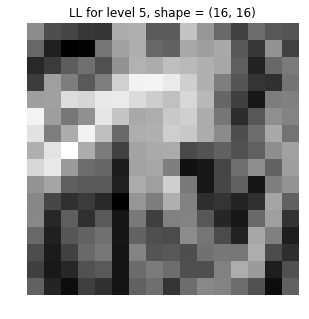

In [2]:
image = mpimg.imread('barbara.png')
plt.figure(figsize = (5, 5))
plt.imshow(image, cmap = 'gray')
plt.title('Original image, shape = ({}, {})'.format(image.shape[0], image.shape[1]))
plt.axis('off')
plt.show()

n = 5
coeffs = pywt.wavedec2(image, 'haar', level = n)
for i in range(n, 0, -1):
    f, ax = plt.subplots(1, 3, figsize=(20, 20))
    ax[0].imshow(coeffs[i][0], cmap='gray')
    ax[0].axis('off')
    ax[1].imshow(coeffs[i][1], cmap='gray')
    ax[1].axis('off')
    ax[2].imshow(coeffs[i][2], cmap='gray')
    ax[2].axis('off')
    print('Level {}, shape = ({}, {})'.format(n-i+1, coeffs[i][0].shape[0], coeffs[i][0].shape[1]))
    plt.show()

plt.figure(figsize = (5, 5))
plt.imshow(coeffs[0], cmap = 'gray')
plt.title('LL for level {}, shape = ({}, {})'.format(n-i+1, coeffs[i][0].shape[0], coeffs[i][0].shape[1]))
plt.axis('off')
plt.show()

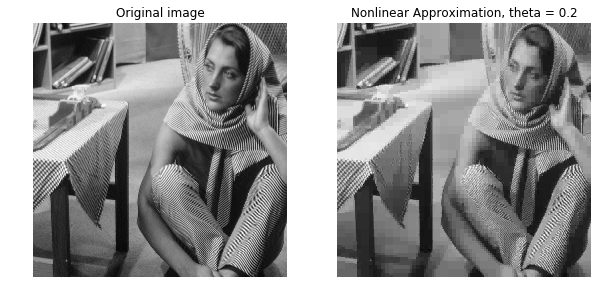

In [3]:
coeffs1 = copy.deepcopy(coeffs)
tmp = coeffs1[0]
#print(np.amin(np.abs(tmp)), np.amax(np.abs(tmp)))
theta = 0.2
Ix = np.abs(tmp) < theta
tmp[Ix] = np.zeros(tmp[Ix].shape)
for i in range(1, n+1):
    for j in range(3):
        tmp = coeffs1[i][j]
        #print(np.amin(np.abs(tmp)), np.amax(np.abs(tmp)))
        Ix = np.abs(tmp) < theta
        tmp[Ix] = np.zeros(tmp[Ix].shape)
img1 = pywt.waverec2(coeffs1, 'haar')

(f, ax) = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(image, cmap = 'gray')
ax[0].set_title('Original image')
ax[0].axis('off')
ax[1].imshow(img1, cmap = 'gray')
ax[1].set_title('Nonlinear Approximation, theta = {}'.format(theta, image.shape[0], image.shape[1]))
ax[1].axis('off')
plt.show()

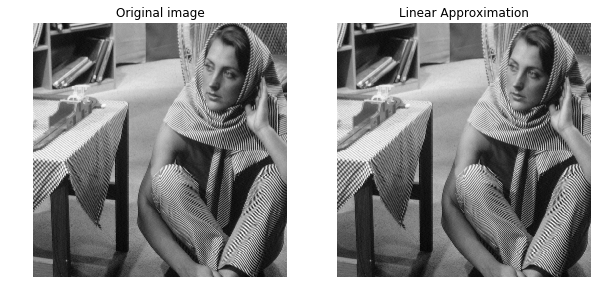

In [4]:
coeffs2 = copy.deepcopy(coeffs)
for i in range(1, n+1):
    for j in range(3):
        tmp = coeffs2[i][j]
        prev = copy.deepcopy(tmp)
        tmp = np.zeros(tmp.shape)
img2 = pywt.waverec2(coeffs2, 'haar')

(f, ax) = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(image, cmap = 'gray')
ax[0].set_title('Original image')
ax[0].axis('off')
ax[1].imshow(img2, cmap = 'gray')
ax[1].set_title('Linear Approximation')
ax[1].axis('off')
plt.show()